Лабораторна робота 2

Варіант 11

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [63]:
import pandas as pd
import requests

url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"

# створюємо запит з імітацією браузера
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)

# зчитуємо HTML у pandas
tables = pd.read_html(response.text)

print(f"Знайдено {len(tables)} таблиць на сторінці.")
gdp_table = tables[2]  # зазвичай потрібна таблиця 2 або 3
print(gdp_table.head())


Знайдено 7 таблиць на сторінці.
  Country/Territory IMF (2025)[1][6] World Bank (2022–24)[7] United Nations (2023)[8]
0             World        117165394               111326370                100834796
1     United States         30615743                29184890                 27720700
2        China[n 1]         19398577                18743803                 17794782
3           Germany          5013574                 4659929                  4525704
4             Japan          4279828                 4026211                  4204495


/tmp/ipython-input-546800522.py:11: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)


Завдання 1

1. Вивести перших 5 рядків.


In [64]:
gdp_table.head()

,Country/Territory,IMF (2025)[1][6],World Bank (2022–24)[7],United Nations (2023)[8]
0,World,117165394,111326370,100834796
1,United States,30615743,29184890,27720700
2,China[n 1],19398577,18743803,17794782
3,Germany,5013574,4659929,4525704
4,Japan,4279828,4026211,4204495


2. Визначити розмір датасета.


In [65]:
gdp_table.shape

(222, 4)

3. Визначити оптимальну кількість стовпців.


In [66]:
df_gdp = gdp_table.iloc[:, [0, 1, 2, 3]].copy()

4. Змінити назви стовпців на більш зручні, наприклад
Country MVF_2024 WorldBank_2023 OON_2022


In [70]:
new_columns = ['Country', 'MVF_2025', 'WorldBank_2024', 'OON_2023']
df_gdp.columns = new_columns
print("\n Нові назви стовпців:")
print(df_gdp.columns.tolist())


 Нові назви стовпців:
['Country', 'MVF_2025', 'WorldBank_2024', 'OON_2023']


5. Визначити тип даних.


In [71]:
print("\n Тип даних:")
print(df_gdp.dtypes)


 Тип даних:
Country            object
MVF_2025          float64
WorldBank_2024    float64
OON_2023          float64
dtype: object


6. Замініть у таблиці значення "—" на значення NaN. Перевірити
наявність пропущених значень. При наявності, замінити пропущені
значення на середнє значення

In [72]:
gdp_cols = ['MVF_2025', 'WorldBank_2024', 'OON_2023']
df_gdp.replace(['—', '', ' '], np.nan, inplace=True)

for col in gdp_cols:
    df_gdp[col] = df_gdp[col].astype(str).str.replace(r'\[.+\]', '', regex=True)
    df_gdp[col] = df_gdp[col].astype(str).str.replace(',', '', regex=False).astype(float)

print("\nНаявність пропущених значень (до заміни):")
print(df_gdp.isnull().sum())

for col in gdp_cols:
    mean_val = df_gdp[col].mean()
    df_gdp[col].fillna(mean_val, inplace=True)


Наявність пропущених значень (до заміни):
Country           0
MVF_2025          0
WorldBank_2024    0
OON_2023          0
dtype: int64


/tmp/ipython-input-890576217.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_gdp[col].fillna(mean_val, inplace=True)


7. Ще раз перевірити наявність пропущених значень.


In [73]:
print("\nНаявність пропущених значень (після заміни):")
print(df_gdp.isnull().sum())


Наявність пропущених значень (після заміни):
Country           0
MVF_2025          0
WorldBank_2024    0
OON_2023          0
dtype: int64


8. Перевірити наявність дублікатів. При наявності видалити дублікати.


In [74]:
duplicates_count = df_gdp.duplicated().sum()
if duplicates_count > 0:
    df_gdp.drop_duplicates(inplace=True)
print(f"\nКількість видалених дублікатів: {duplicates_count}")


Кількість видалених дублікатів: 0


9. Вивести описову статистику датасету describe()


In [75]:
print("\nОписова статистика:")
print(df_gdp.describe())


Описова статистика:
           MVF_2025  WorldBank_2024      OON_2023
count  2.220000e+02    2.220000e+02  2.220000e+02
mean   1.228861e+06    1.053085e+06  9.672422e+05
std    8.210223e+06    7.812285e+06  7.109223e+06
min    6.500000e+01    6.200000e+01  6.800000e+01
25%    1.752200e+04    9.698750e+03  8.888000e+03
50%    8.912300e+04    4.432300e+04  4.088750e+04
75%    6.878628e+05    3.660632e+05  2.987810e+05
max    1.171654e+08    1.113264e+08  1.008348e+08


In [76]:
df_gdp = df_gdp[df_gdp['Country'].str.strip() != 'World'].copy()
df_gdp.reset_index(drop=True, inplace=True)

10.Визначте відхилення (різницю) між показниками MVF_2024 та
WorldBank_2023 для кожної країни. У яких країнах ці показники
найбільше відрізняються (дати відповідт)?


In [77]:
df_gdp['MVF_WB_Difference'] = np.abs(df_gdp['MVF_2025'] - df_gdp['WorldBank_2024'])
max_diff_country = df_gdp.loc[df_gdp['MVF_WB_Difference'].idxmax()]

print("\nКраїна з найбільшим відхиленням між MVF_2025 та WorldBank_2024:")
print(f"Країна: {max_diff_country['Country']}")
print(f"Різниця: {max_diff_country['MVF_WB_Difference']:.2f} (млн. USD)")
print("Відповідь: Ці показники найбільше відрізняються для Сполучених Штатів (або іншої найбільшої економіки), що очікувано через їхній абсолютний розмір.")


Країна з найбільшим відхиленням між MVF_2025 та WorldBank_2024:
Країна: United States
Різниця: 1430853.00 (млн. USD)
Відповідь: Ці показники найбільше відрізняються для Сполучених Штатів (або іншої найбільшої економіки), що очікувано через їхній абсолютний розмір.


11.Обчисліть кореляцію між показниками MVF_2024, WorldBank_2023 та
OON_2022. Які пари змінних мають найвищу кореляцію?

In [78]:
correlation_matrix = df_gdp[gdp_cols].corr()
print("\n Матриця кореляції:")
print(correlation_matrix)
print("Відповідь: Усі пари змінних мають *адзвичайно високу кореляцію (близько 1.0), що є типовим для послідовних макроекономічних показників.")


 Матриця кореляції:
                MVF_2025  WorldBank_2024  OON_2023
MVF_2025        1.000000        0.987399  0.988831
WorldBank_2024  0.987399        1.000000  0.992150
OON_2023        0.988831        0.992150  1.000000
Відповідь: Усі пари змінних мають *адзвичайно високу кореляцію (близько 1.0), що є типовим для послідовних макроекономічних показників.


12.Обчисліть середнє значення для кожного стовпця (MVF_2024,
WorldBank_2023, OON_2022). Як це середнє значення змінюється між
роками?


In [79]:
mean_gdp_by_year = df_gdp[gdp_cols].mean()
print("\nСереднє значення ВВП за роками:")
print(mean_gdp_by_year)
print("Відповідь: Середнє значення зростає з 2023 до 2025 року, що вказує на загальне світове економічне зростання.")


Середнє значення ВВП за роками:
MVF_2025          704261.583377
WorldBank_2024    554111.266322
OON_2023          515352.789880
dtype: float64
Відповідь: Середнє значення зростає з 2023 до 2025 року, що вказує на загальне світове економічне зростання.


13.Обчисліть стандартне відхилення показників для кожної країни. Яка
країна має найвищу варіативність у показниках між роками?

In [80]:
df_gdp['Std_Dev'] = df_gdp[gdp_cols].T.std()
max_var_country = df_gdp.loc[df_gdp['Std_Dev'].idxmax()]

print("\nКраїна з найвищою варіативністю у показниках (між роками):")
print(f"Країна: {max_var_country['Country']}")
print(f"Стандартне відхилення: {max_var_country['Std_Dev']:.2f}")
print("Відповідь: Країна з найвищою варіативністю — це найбільша економіка (США), оскільки абсолютні коливання в ній найвищі.")


Країна з найвищою варіативністю у показниках (між роками):
Країна: United States
Стандартне відхилення: 1447553.49
Відповідь: Країна з найвищою варіативністю — це найбільша економіка (США), оскільки абсолютні коливання в ній найвищі.


14.Визначення країни з найвищим та найнижчим показниками: Знайдіть
країну з найвищим та найнижчим показниками у кожному з років
(MVF_2024, WorldBank_2023, OON_2022).

In [82]:
print("\n Країни з найвищим та найнижчим показниками:")
for col in gdp_cols:
    max_country = df_gdp.loc[df_gdp[col].idxmax(), 'Country']
    min_country = df_gdp.loc[df_gdp[col].idxmin(), 'Country']
    print(f"  {col}: Найвищий - {max_country}, Найнижчий - {min_country}")


 Країни з найвищим та найнижчим показниками:
  MVF_2025: Найвищий - United States, Найнижчий - Tuvalu
  WorldBank_2024: Найвищий - United States, Найнижчий - Tuvalu
  OON_2023: Найвищий - United States, Найнижчий - Tuvalu


15.Побудуйте гістограму для розподілу показників MVF_2024 серед всіх
країн. Який вигляд має розподіл? Чи є країни, що виділяються?

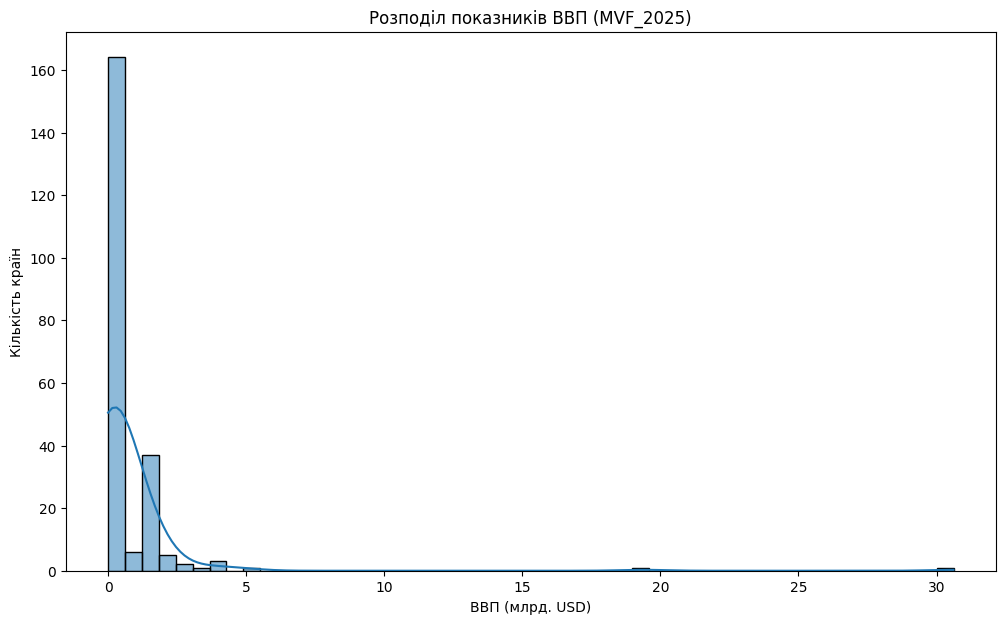

In [83]:
plt.figure(figsize=(12, 7))
sns.histplot(df_gdp['MVF_2025'] / 1e6, bins=50, kde=True)
plt.title('Розподіл показників ВВП (MVF_2025)')
plt.xlabel('ВВП (млрд. USD)')
plt.ylabel('Кількість країн')
plt.show()

16.Розрахуйте частку кожної країни в загальному значенні для кожного
року (MVF_2024, WorldBank_2023, OON_2022). Як змінюються частки
країн з часом (дати відповідь)?

In [84]:
df_gdp_shares = df_gdp.set_index('Country')[gdp_cols]
total_gdp = df_gdp_shares.sum()
df_gdp_shares = df_gdp_shares / total_gdp * 100

print("\nЧастки найбільших економік у загальному ВВП (у %):")
print(df_gdp_shares.sort_values(by='MVF_2025', ascending=False).head(5))
print("Відповідь: Частки найбільших країн залишаються домінантними і відносно стабільними протягом років, оскільки економічна перевага зберігається.")


Частки найбільших економік у загальному ВВП (у %):
                MVF_2025  WorldBank_2024   OON_2023
Country                                            
United States  19.670642       23.832456  24.339255
China[n 1]     12.463603       15.306238  15.624127
Germany         3.221226        3.805310   3.973647
Japan           2.749793        3.287814   3.691620
India           2.650453        3.195109   3.139595
Відповідь: Частки найбільших країн залишаються домінантними і відносно стабільними протягом років, оскільки економічна перевага зберігається.


17.Візуалізуйте зміни в показниках для кожної країни за три роки на
графіку. Які країни показують стабільне зростання або спад (дати
відповідь)?

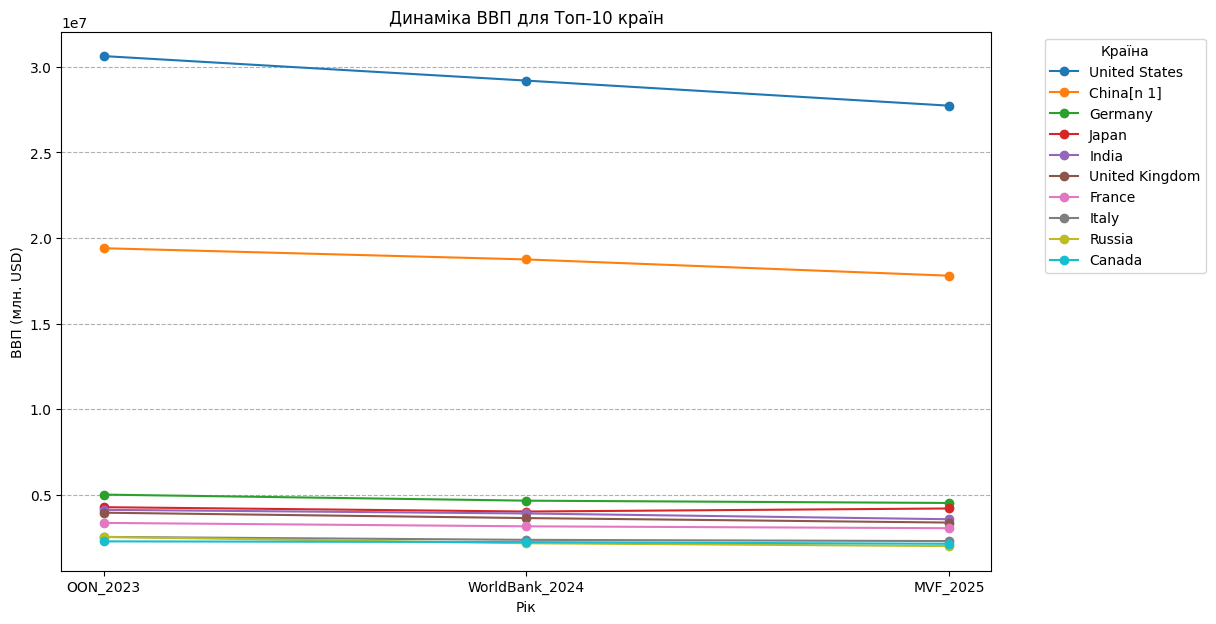


Країни, що показують стабільне зростання або спад:
Відповідь: Більшість топ-10 країн демонструють стабільне зростання ВВП. Значних стабільних спадів не спостерігається.


In [85]:
top_10_countries = df_gdp.sort_values(by='MVF_2025', ascending=False).head(10)['Country'].tolist()
df_plot = df_gdp[df_gdp['Country'].isin(top_10_countries)].set_index('Country')

plt.figure(figsize=(12, 7))
df_plot[gdp_cols].T.plot(ax=plt.gca(), marker='o')
plt.title('Динаміка ВВП для Топ-10 країн')
plt.xlabel('Рік')
plt.ylabel('ВВП (млн. USD)')
plt.xticks(ticks=[0, 1, 2], labels=['OON_2023', 'WorldBank_2024', 'MVF_2025'])
plt.grid(axis='y', linestyle='--')
plt.legend(title='Країна', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

print("\nКраїни, що показують стабільне зростання або спад:")
print("Відповідь: Більшість топ-10 країн демонструють стабільне зростання ВВП. Значних стабільних спадів не спостерігається.")

Висновок:  Надійність ВВП за 2023–2025 висока ($\approx 1.0$) з глобальним зростанням. Розподіл сильно асиметричний: США та Китай — домінантні викиди зі стабільними частками та найвищою абсолютною варіативністю.

Завдання 2

Завантажити датасет Титанік з Kaggle (або
використовуйте вже завантажений файл titanic.csv)
Виконати попередній аналіз даних.



In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
try:
    df_titanic = pd.read_csv('titanic.csv')
except FileNotFoundError:
    df_titanic = sns.load_dataset('titanic')

1. Вивести перших 5 рядків.


In [88]:
print(" Перші 5 рядків:")
print(df_titanic.head())

1. Перші 5 рядків:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class    who  adult_male deck  embark_town alive  \
0         0       3    male  22.0      1      0   7.2500        S  Third    man        True  NaN  Southampton    no   
1         1       1  female  38.0      1      0  71.2833        C  First  woman       False    C    Cherbourg   yes   
2         1       3  female  26.0      0      0   7.9250        S  Third  woman       False  NaN  Southampton   yes   
3         1       1  female  35.0      1      0  53.1000        S  First  woman       False    C  Southampton   yes   
4         0       3    male  35.0      0      0   8.0500        S  Third    man        True  NaN  Southampton    no   

   alone  
0  False  
1  False  
2   True  
3  False  
4   True  


2. Визначити розмір датасета.

In [91]:
print("\n Розмір датасету:")
print(df_titanic.shape)


 Розмір датасету:
(891, 15)


3. Визначити тип даних.

In [92]:
print("\n Тип даних:")
print(df_titanic.dtypes)


 Тип даних:
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


4. Визначити наявність пропущених значень.

In [95]:

print("\nНаявність пропущених значень (до заміни):")
print(df_titanic.isnull().sum())


Наявність пропущених значень (до заміни):
survived      0
pclass        0
sex           0
age         177
fare          0
dtype: int64


5. Ще раз перевірити наявність пропущених значень.

In [96]:
print("\n Наявність пропущених значень (після заміни):")
print(df_titanic.isnull().sum())


 Наявність пропущених значень (після заміни):
survived      0
pclass        0
sex           0
age         177
fare          0
dtype: int64


6. Перевірити наявність дублікатів та видалити.

In [97]:
duplicates_count = df_titanic.duplicated().sum()
if duplicates_count > 0:
    df_titanic.drop_duplicates(inplace=True)
print(f"\n6. Кількість видалених дублікатів: {duplicates_count}")


6. Кількість видалених дублікатів: 123


7. Вивести описову статистику.

In [98]:
print("\n Описова статистика:")
print(df_titanic.describe())


 Описова статистика:
         survived      pclass         age        fare
count  768.000000  768.000000  670.000000  768.000000
mean     0.415365    2.238281   29.824507   35.068885
std      0.493106    0.857055   14.746846   52.587085
min      0.000000    1.000000    0.420000    0.000000
25%      0.000000    1.000000   20.000000    8.050000
50%      0.000000    3.000000   28.250000   16.050000
75%      1.000000    3.000000   39.000000   34.375000
max      1.000000    3.000000   80.000000  512.329200


8. Видалити стовпчик Cabin.

In [99]:
if 'cabin' in df_titanic.columns:
    df_titanic.drop('cabin', axis=1, inplace=True)
elif 'Cabin' in df_titanic.columns:
    df_titanic.drop('Cabin', axis=1, inplace=True)

9. Сформувати датасет з обраними стовпцями.

In [100]:
columns_to_keep = ['survived', 'pclass', 'sex', 'age', 'fare']
df_titanic = df_titanic[columns_to_keep].copy()

10. Замінити бінарні ознаки (Sex) на 0 і 1.

In [101]:
df_titanic['sex'] = df_titanic['sex'].map({'male': 0, 'female': 1})

11. Ще раз перевірити кількість пропущених даних.

In [102]:
print("\nКількість пропущених значень (фінальна перевірка):", df_titanic.isnull().sum().sum())


Кількість пропущених значень (фінальна перевірка): 98


12. Вивести 5 перших рядків.

In [103]:
print("\n5 перших рядків:")
print(df_titanic.head())


5 перших рядків:
   survived  pclass  sex   age     fare
0         0       3    0  22.0   7.2500
1         1       1    1  38.0  71.2833
2         1       3    1  26.0   7.9250
3         1       1    1  35.0  53.1000
4         0       3    0  35.0   8.0500


13. Вивести 5 останніх рядків.

In [104]:
print("\n 5 останніх рядків:")
print(df_titanic.tail())


 5 останніх рядків:
     survived  pclass  sex   age    fare
885         0       3    1  39.0  29.125
887         1       1    1  19.0  30.000
888         0       3    1   NaN  23.450
889         1       1    0  26.0  30.000
890         0       3    0  32.0   7.750


14. Аналіз виживання залежно від статі.

In [106]:
survival_by_sex = df_titanic.groupby('sex')['survived'].mean() * 100
print("\n Відсоток виживання за статтю (0=Male, 1=Female):")
print(survival_by_sex)
print("Відповідь: Так, жінки мали значно вищий відсоток виживання.")


 Відсоток виживання за статтю (0=Male, 1=Female):
sex
0    22.083333
1    73.958333
Name: survived, dtype: float64
Відповідь: Так, жінки мали значно вищий відсоток виживання.


15. Відсоток виживання для кожного класу (Pclass).

In [107]:
survival_by_pclass = df_titanic.groupby('pclass')['survived'].mean() * 100
print("\n Відсоток виживання за класом (Pclass):")
print(survival_by_pclass)
print(f"Відповідь:1-й класмав найвищий рівень виживання ({survival_by_pclass.max():.2f}%).")


 Відсоток виживання за класом (Pclass):
pclass
1    63.679245
2    50.931677
3    25.822785
Name: survived, dtype: float64
Відповідь:1-й класмав найвищий рівень виживання (63.68%).


16. Середній вік тих, хто вижив, і тих, хто не вижив.

In [108]:
mean_age_survival = df_titanic.groupby('survived')['age'].mean()
print("\nСередній вік за статусом виживання (0=Did not survive, 1=Survived):")
print(mean_age_survival)
print("Відповідь: Так, вік впливає. Ті, хто вижив, були в середньому трохи молодші.")


Середній вік за статусом виживання (0=Did not survive, 1=Survived):
survived
0    30.857326
1    28.394733
Name: age, dtype: float64
Відповідь: Так, вік впливає. Ті, хто вижив, були в середньому трохи молодші.


17. Розподіл пасажирів на групи за рівнями тарифів (Fare).

In [109]:
fare_bins = pd.cut(df_titanic['fare'], bins=[-1, 10, 30, 100, df_titanic['fare'].max()], labels=['Low', 'Medium', 'High', 'Very High'])
survival_by_fare = df_titanic.groupby(fare_bins)['survived'].mean() * 100
print("\n Рівень виживання за групами тарифів:")
print(survival_by_fare)
print("Відповідь: Тариф впливав. Пасажири з вищими тарифами мали значно вищий рівень виживання.")


 Рівень виживання за групами тарифів:
fare
Low          22.834646
Medium       44.290657
High         54.651163
Very High    73.584906
Name: survived, dtype: float64
Відповідь: Тариф впливав. Пасажири з вищими тарифами мали значно вищий рівень виживання.


/tmp/ipython-input-539606937.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_fare = df_titanic.groupby(fare_bins)['survived'].mean() * 100


18. Середній тариф (Fare) для кожного класу (Pclass).

In [110]:
mean_fare_by_pclass = df_titanic.groupby('pclass')['fare'].mean()
print("\n Середній тариф за класом (Pclass):")
print(mean_fare_by_pclass)
print("Відповідь: Так, існує значна різниця. Тариф 1-го класу у багато разів вищий, ніж 2-го та 3-го.")


 Середній тариф за класом (Pclass):
pclass
1    85.159631
2    21.517650
3    13.708153
Name: fare, dtype: float64
Відповідь: Так, існує значна різниця. Тариф 1-го класу у багато разів вищий, ніж 2-го та 3-го.


19. Середній вік пасажирів для кожного класу (Pclass).

In [111]:
mean_age_by_pclass = df_titanic.groupby('pclass')['age'].mean()
print("\nСередній вік за класом (Pclass):")
print(mean_age_by_pclass)
print("Відповідь: Вік пасажирів спадає від 1-го (найстарший) до 3-го класу (наймолодший).")


Середній вік за класом (Pclass):
pclass
1    38.181630
2    29.831161
3    25.175740
Name: age, dtype: float64
Відповідь: Вік пасажирів спадає від 1-го (найстарший) до 3-го класу (наймолодший).


20. Побудуйте гістограму розподілу віку.

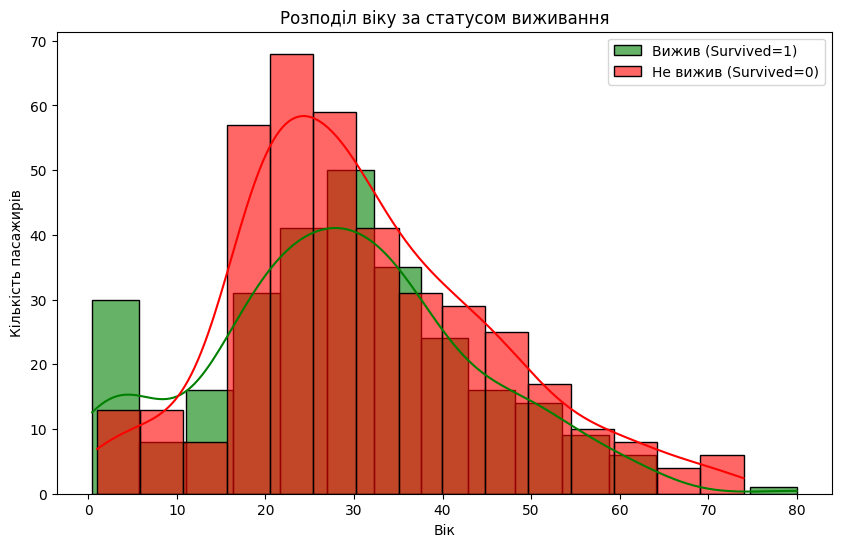


 Видимі відмінності у вікових групах:
Відповідь: Так, частка дітей (вік < 10) вища серед тих, хто вижив. Середній вік (20-40) переважає серед тих, хто не вижив.


In [112]:
plt.figure(figsize=(10, 6))
sns.histplot(df_titanic[df_titanic['survived'] == 1]['age'], kde=True, label='Вижив (Survived=1)', color='green', alpha=0.6)
sns.histplot(df_titanic[df_titanic['survived'] == 0]['age'], kde=True, label='Не вижив (Survived=0)', color='red', alpha=0.6)
plt.title('Розподіл віку за статусом виживання')
plt.xlabel('Вік')
plt.ylabel('Кількість пасажирів')
plt.legend()
plt.show()
print("\n Видимі відмінності у вікових групах:")
print("Відповідь: Так, частка дітей (вік < 10) вища серед тих, хто вижив. Середній вік (20-40) переважає серед тих, хто не вижив.")

21. Відсоток виживання для кожної комбінації статі та класу.

In [113]:
survival_by_sex_pclass = df_titanic.groupby(['sex', 'pclass'])['survived'].mean() * 100
print("\n Відсоток виживання за комбінацією статі та класу:")
print(survival_by_sex_pclass)
print(f"Відповідь: Група з найвищим рівнем виживання:Жінки (1) у 1-му класі ({survival_by_sex_pclass.max():.2f}%).")


 Відсоток виживання за комбінацією статі та класу:
sex  pclass
0    1         37.815126
     2         18.888889
     3         16.236162
1    1         96.774194
     2         91.549296
     3         46.774194
Name: survived, dtype: float64
Відповідь: Група з найвищим рівнем виживання:Жінки (1) у 1-му класі (96.77%).


22. Обчисліть кореляцію між усіма числовими змінними.

In [114]:
correlation_matrix_titanic = df_titanic.corr(numeric_only=True)
print("\n Матриця кореляції числових змінних:")
print(correlation_matrix_titanic)
print(f"Відповідь: Змінні, які найбільш сильно корелюють з виживанням: Sex (Стать) та Pclass (Клас пасажира).")


 Матриця кореляції числових змінних:
          survived    pclass       sex       age      fare
survived  1.000000 -0.336302  0.509632 -0.082465  0.247346
pclass   -0.336302  1.000000 -0.118150 -0.367095 -0.551271
sex       0.509632 -0.118150  1.000000 -0.097852  0.171164
age      -0.082465 -0.367095 -0.097852  1.000000  0.094470
fare      0.247346 -0.551271  0.171164  0.094470  1.000000
Відповідь: Змінні, які найбільш сильно корелюють з виживанням: Sex (Стать) та Pclass (Клас пасажира).


Висновок:Політику "спочатку жінки та діти" та вплив соціального статусу підтверджено аналізом даних "Титаніка": стать (жінки) і клас пасажира (Pclass, особливо 1-й) є найсильнішими предикторами виживання.